# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


# Load the dataset from the CSV file
diabetes_data = pd.read_csv("diabetes.csv")

In [2]:
# Explore the first few rows of the dataset to get an initial understanding
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# For summary statistics
summary_stats = diabetes_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [5]:
# To check the data types of each column
data_types = diabetes_data.dtypes
print("Data Types:\n", data_types)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


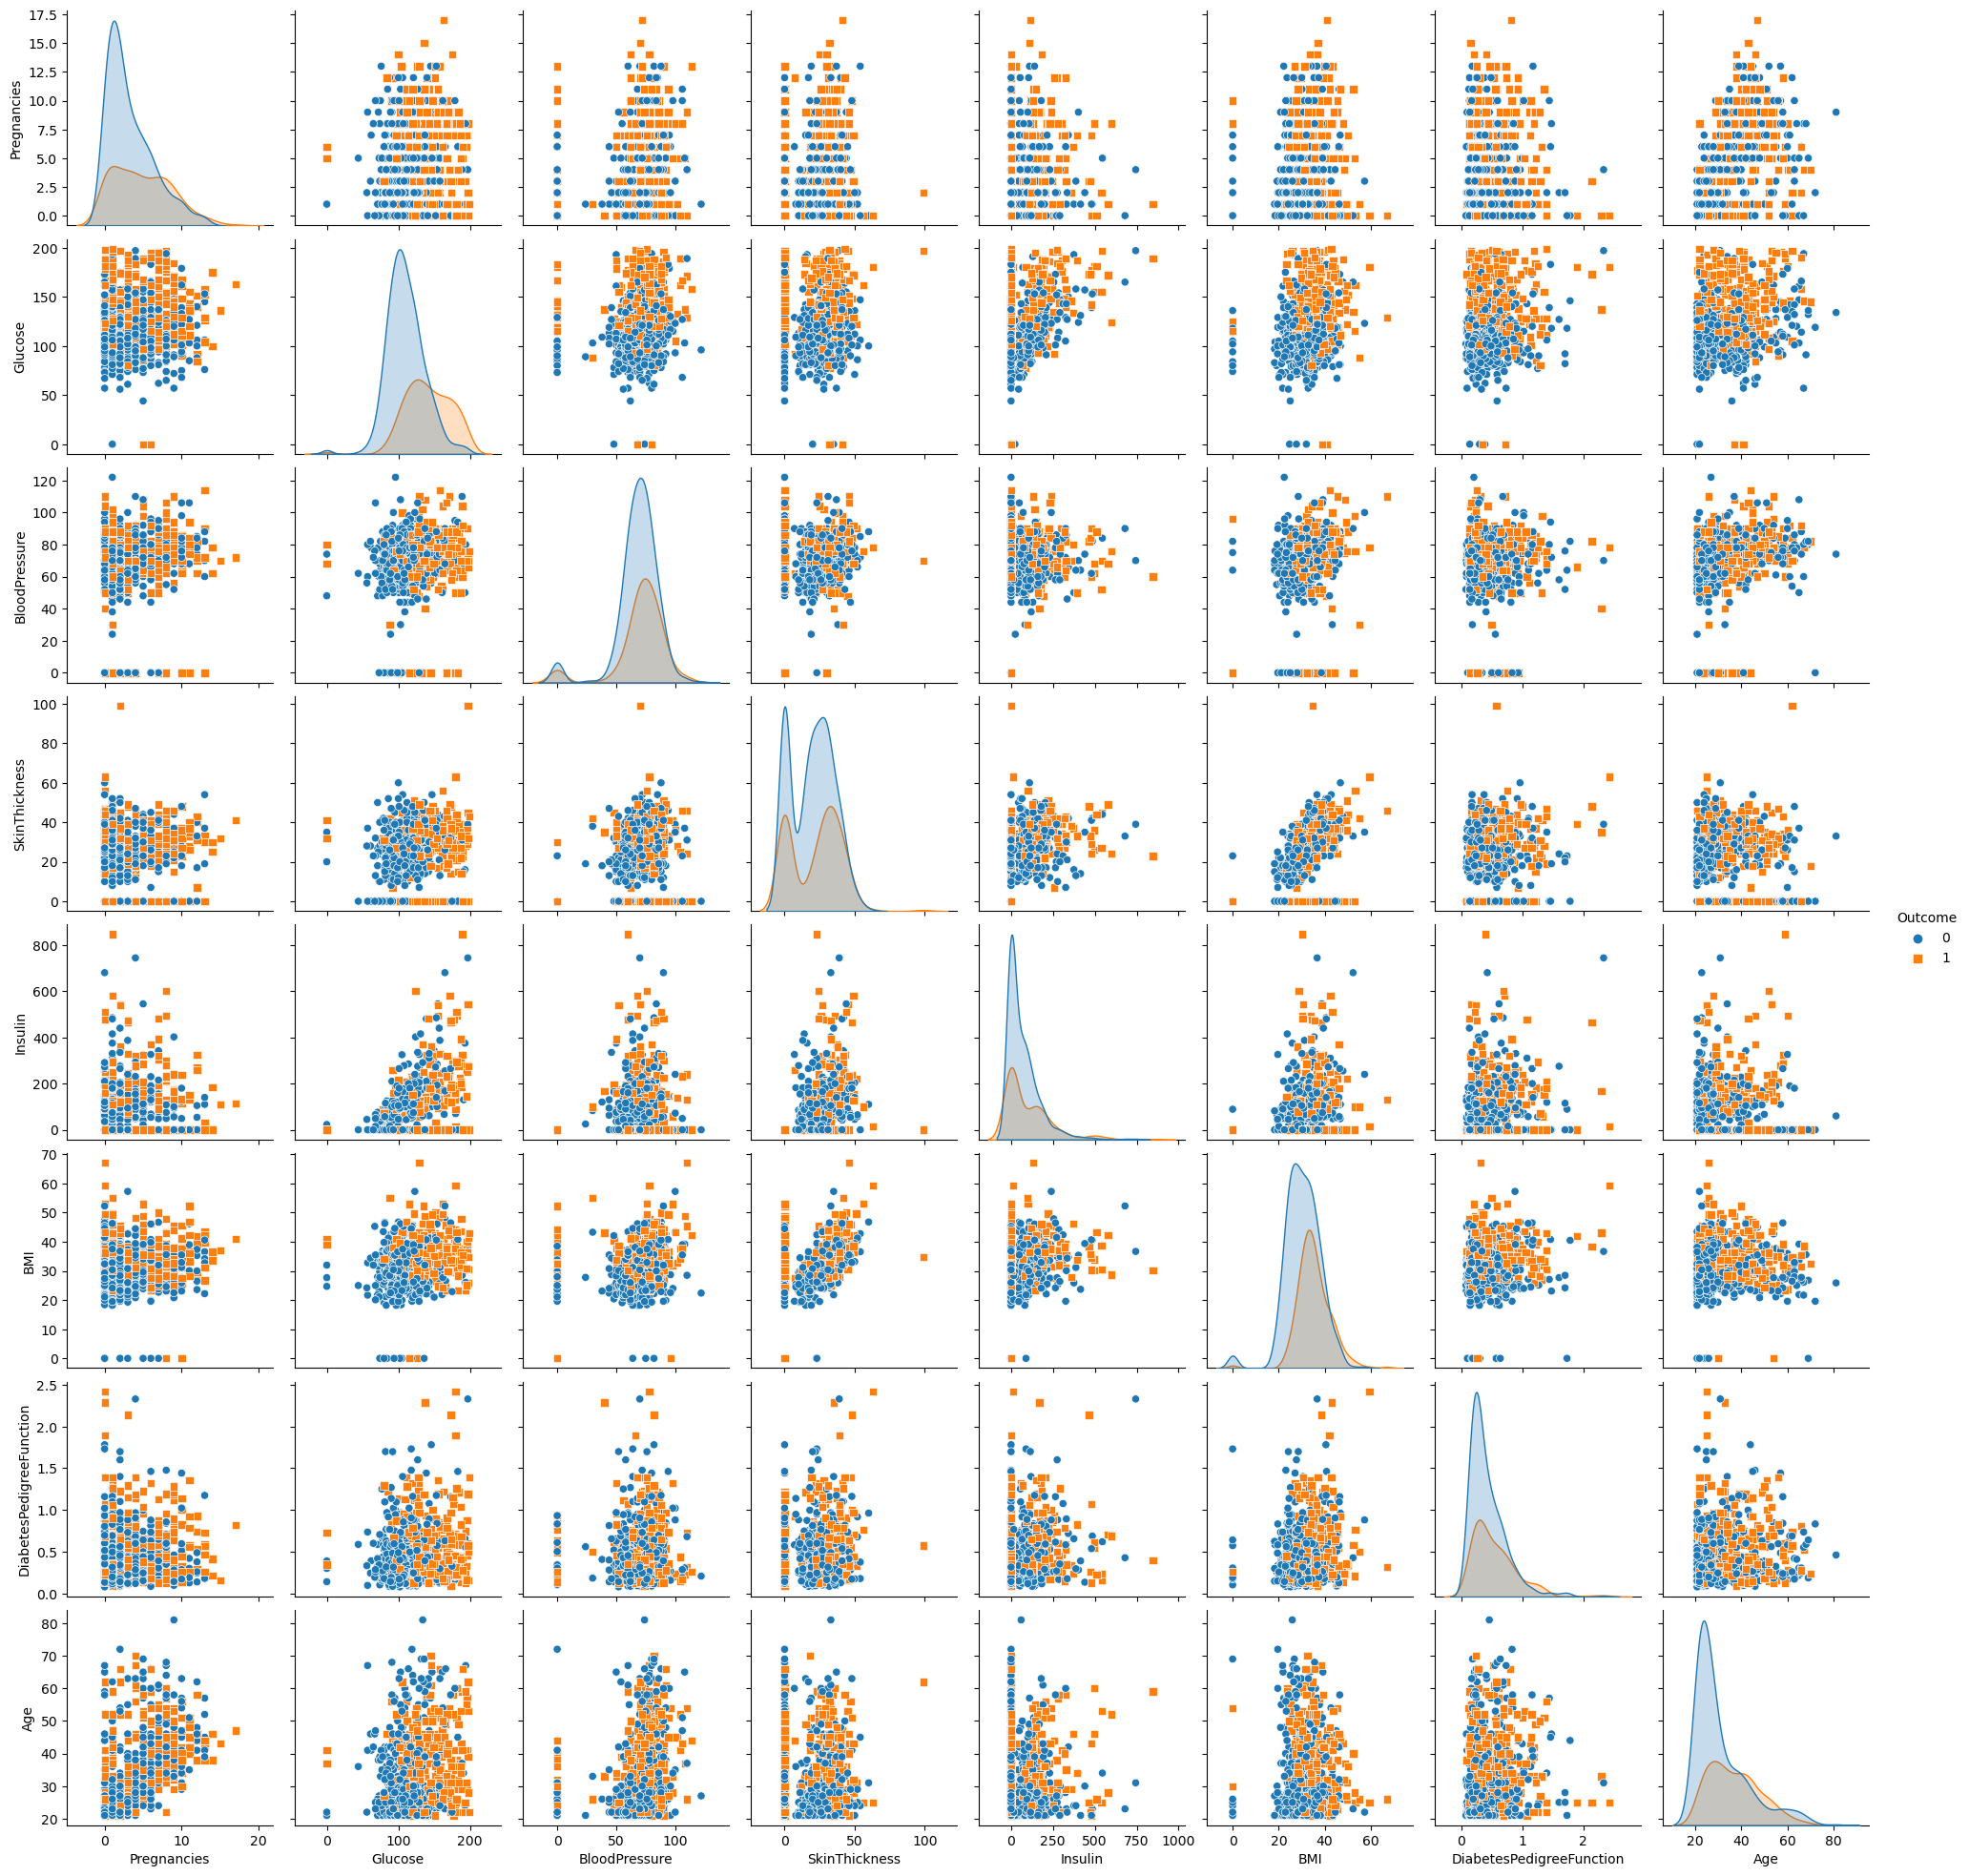

In [6]:
# Pair plots to visualize relationships between predictor variables and the outcome variable
sns.pairplot(diabetes_data, hue="Outcome", markers=["o", "s"])
plt.show()

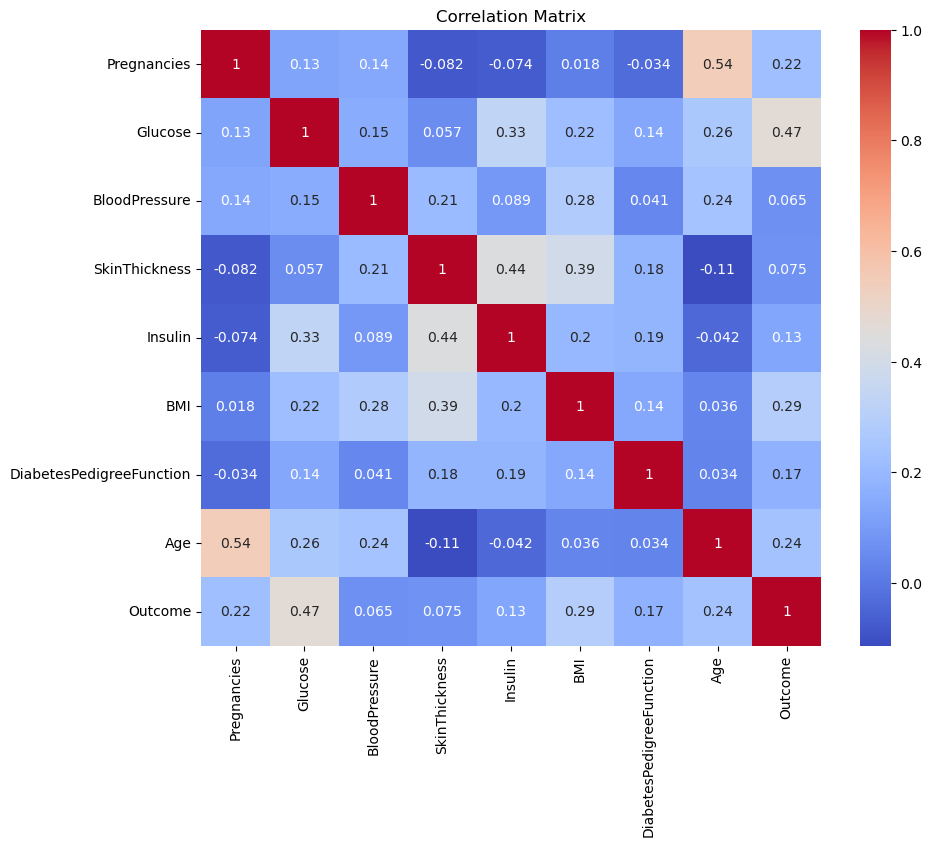

In [7]:
# Correlation between predictor variables
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

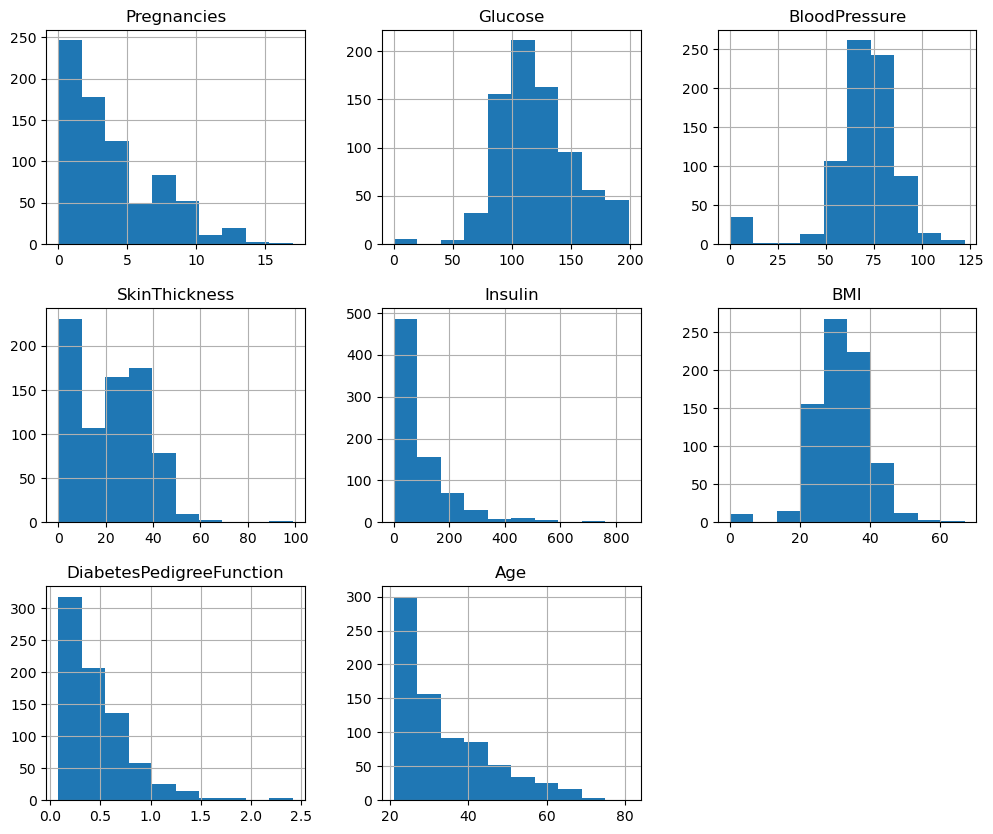

In [8]:
# Distribution of predictor variables
diabetes_data.drop("Outcome", axis=1).hist(figsize=(12, 10))
plt.show()

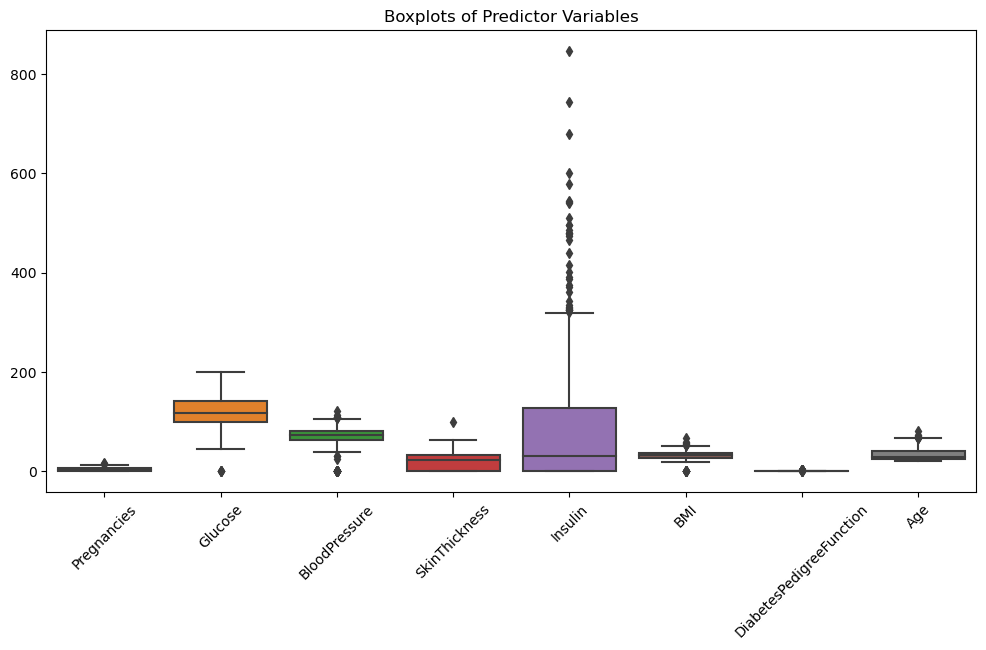

In [9]:
# To detect and visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_data.drop(["Outcome"], axis=1))
plt.xticks(rotation=45)
plt.title("Boxplots of Predictor Variables")
plt.show()

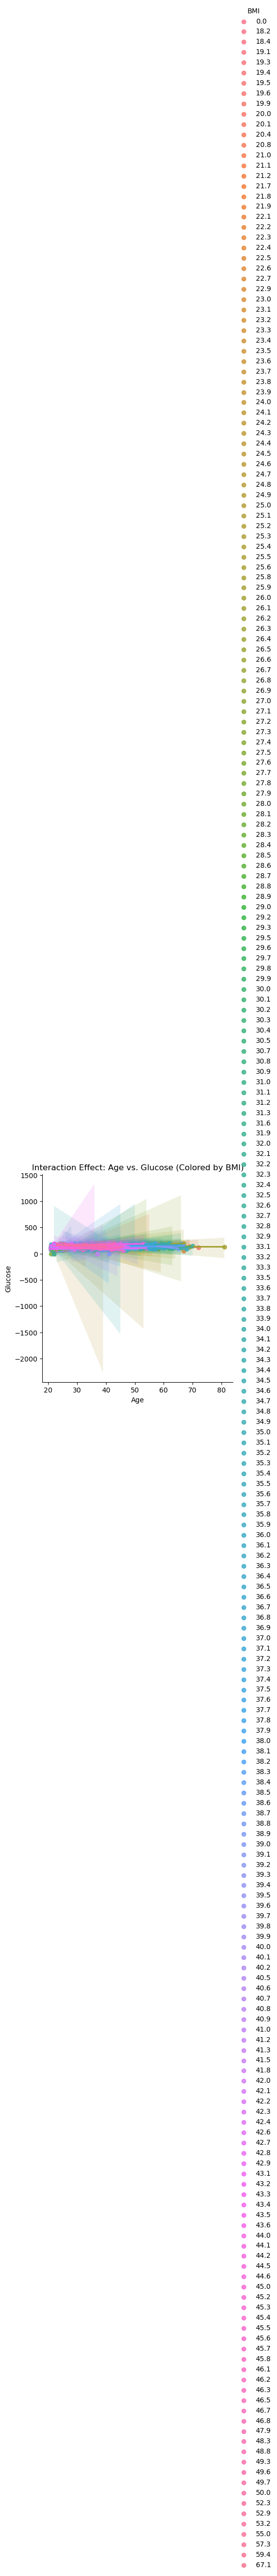

In [10]:
# Interaction between 'Age' and 'BMI' on 'Glucose'
sns.lmplot(x="Age", y="Glucose", hue="BMI", data=diabetes_data)
plt.title("Interaction Effect: Age vs. Glucose (Colored by BMI)")
plt.show()

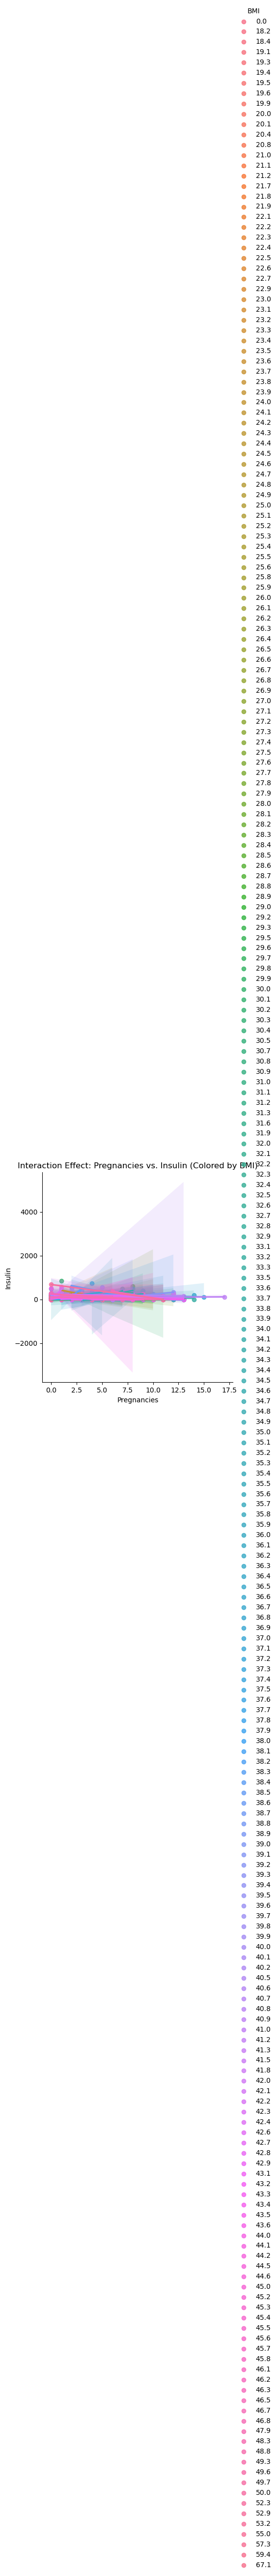

In [11]:
# Interaction between 'Pregnancies' and 'BMI' on 'Insulin'
sns.lmplot(x="Pregnancies", y="Insulin", hue="BMI", data=diabetes_data)
plt.title("Interaction Effect: Pregnancies vs. Insulin (Colored by BMI)")
plt.show()

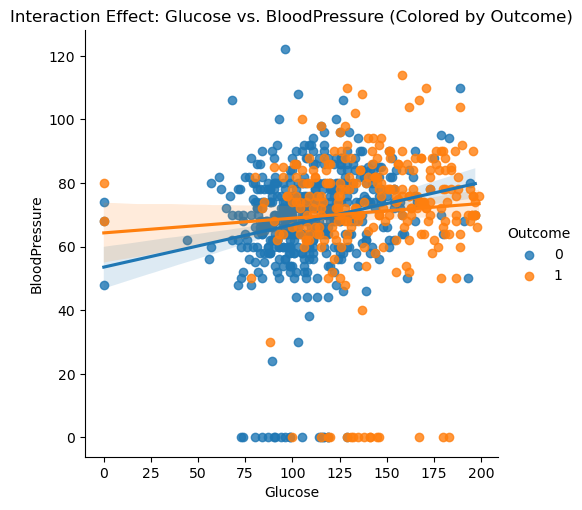

In [12]:
# Interaction between 'Glucose' and 'BloodPressure' on 'Outcome'
sns.lmplot(x="Glucose", y="BloodPressure", hue="Outcome", data=diabetes_data)
plt.title("Interaction Effect: Glucose vs. BloodPressure (Colored by Outcome)")
plt.show()

In [13]:
# Average age of individuals
average_age = diabetes_data["Age"].mean()
print("Average Age:", average_age)

Average Age: 33.240885416666664


In [14]:
# Average glucose level for individuals with and without diabetes
average_glucose_with_diabetes = diabetes_data[diabetes_data["Outcome"] == 1]["Glucose"].mean()
average_glucose_without_diabetes = diabetes_data[diabetes_data["Outcome"] == 0]["Glucose"].mean()
print("Average Glucose (Diabetes):", average_glucose_with_diabetes)
print("Average Glucose (No Diabetes):", average_glucose_without_diabetes)

Average Glucose (Diabetes): 141.25746268656715
Average Glucose (No Diabetes): 109.98


In [15]:
# Average BMI for individuals with and without diabetes
average_bmi_with_diabetes = diabetes_data[diabetes_data["Outcome"] == 1]["BMI"].mean()
average_bmi_without_diabetes = diabetes_data[diabetes_data["Outcome"] == 0]["BMI"].mean()
print("Average BMI (Diabetes):", average_bmi_with_diabetes)
print("Average BMI (No Diabetes):", average_bmi_without_diabetes)

Average BMI (Diabetes): 35.14253731343284
Average BMI (No Diabetes): 30.3042


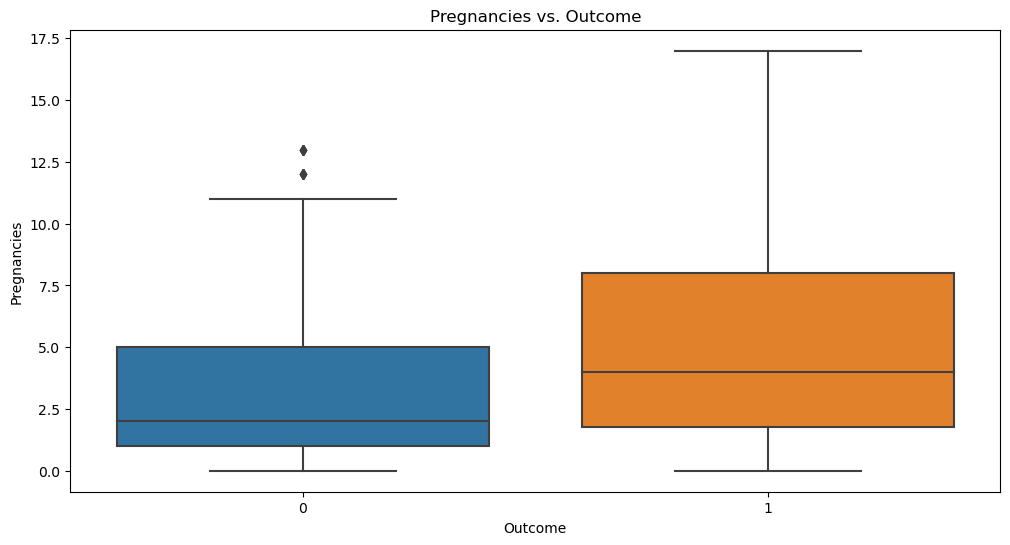

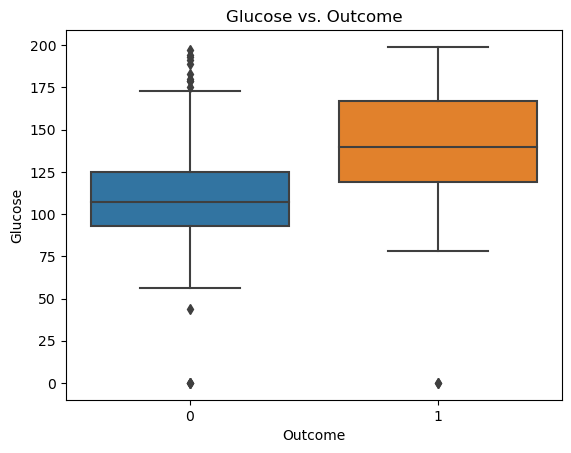

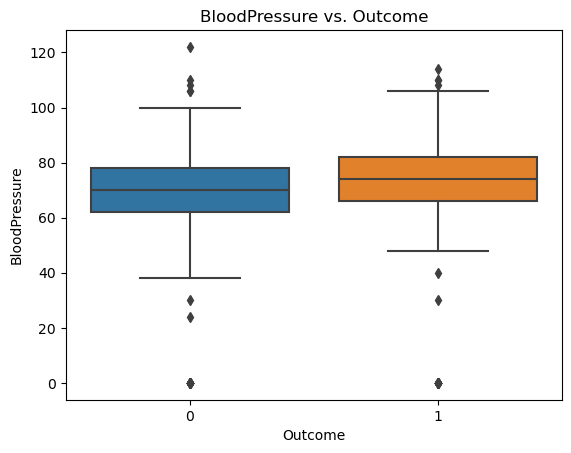

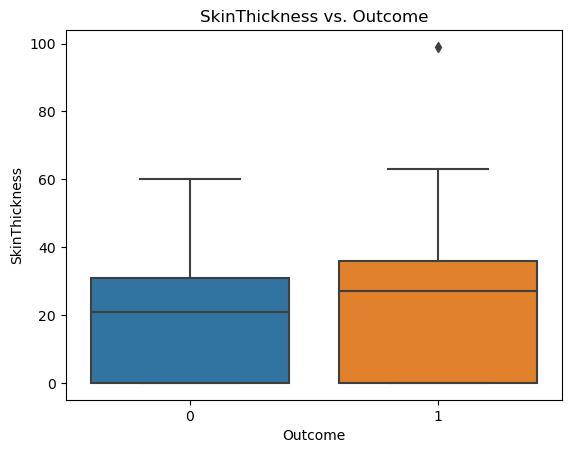

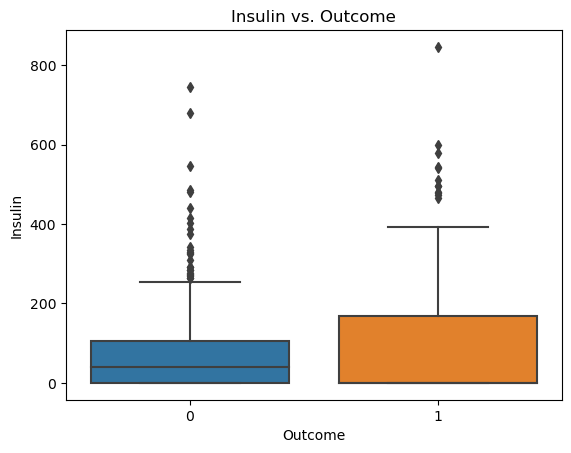

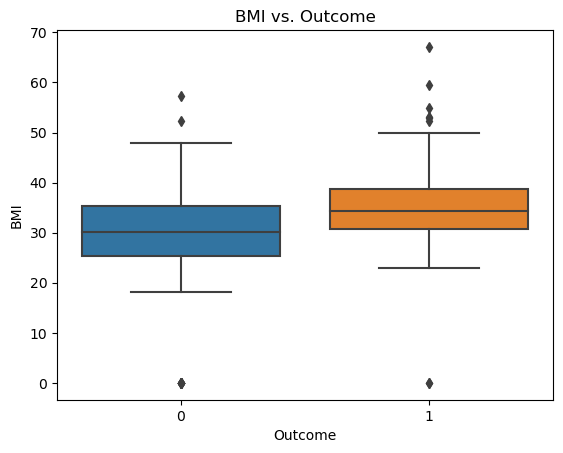

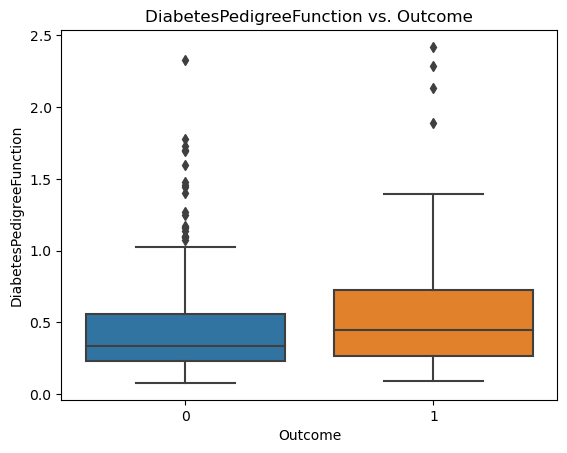

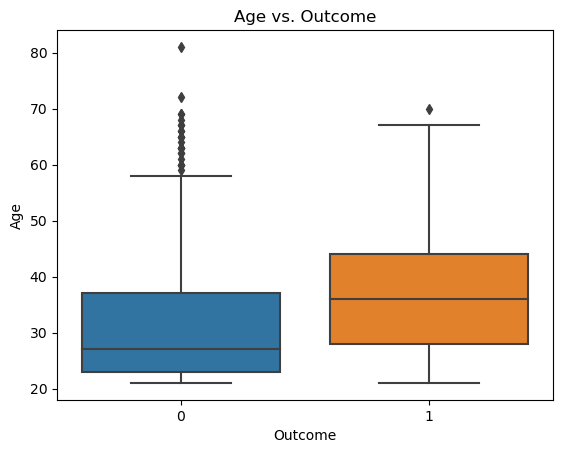

In [16]:
# Differences in predictor variables for individuals with and without diabetes
plt.figure(figsize=(12, 6))
for column in diabetes_data.columns[:-1]:  # Exclude the Outcome column
    sns.boxplot(x="Outcome", y=column, data=diabetes_data)
    plt.title(f"{column} vs. Outcome")
    plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [19]:
# Outlier Handling
for col in diabetes_data.columns[:-1]:  # Exclude the 'Outcome' column
    if diabetes_data[col].skew() < 0.5 and diabetes_data[col].skew() > -0.5:
        up_limit = diabetes_data[col].mean() + 3 * diabetes_data[col].std()
        lw_limit = diabetes_data[col].mean() - 3 * diabetes_data[col].std()
        diabetes_data[col] = np.where(diabetes_data[col] > up_limit, up_limit,
                                       np.where(diabetes_data[col] < lw_limit, lw_limit, diabetes_data[col]))
    elif diabetes_data[col].skew() > 0.5 or diabetes_data[col].skew() < -0.5:
        q3 = diabetes_data[col].quantile(0.75)
        q1 = diabetes_data[col].quantile(0.25)
        IQR = q3 - q1
        up_limit = q3 + 1.5 * IQR
        lw_limit = q1 - 1.5 * IQR
        diabetes_data[col] = np.where(diabetes_data[col] > up_limit, up_limit,
                                       np.where(diabetes_data[col] < lw_limit, lw_limit, diabetes_data[col]))

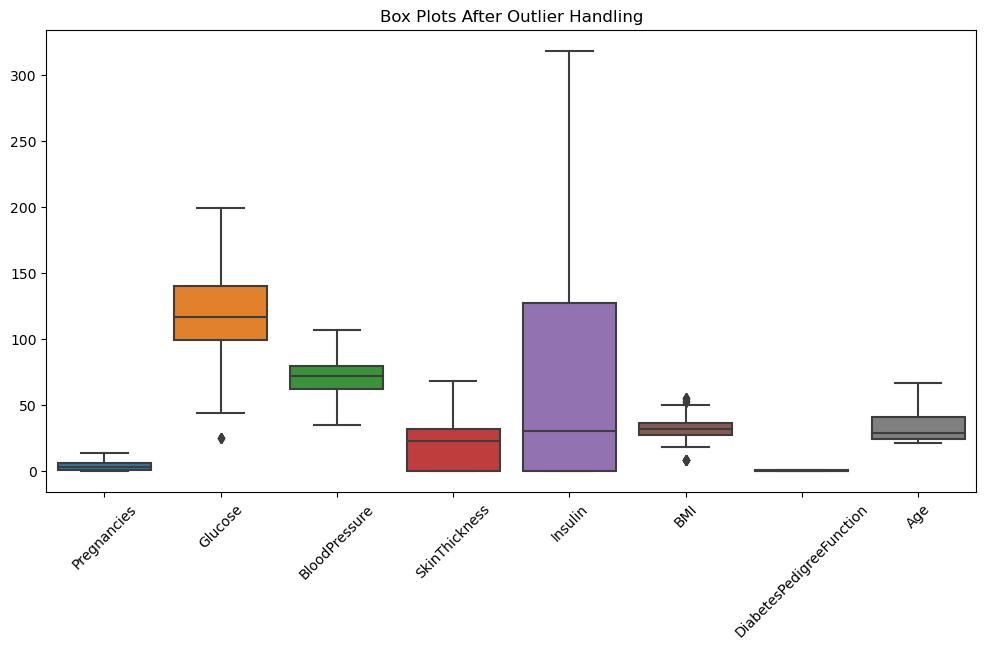

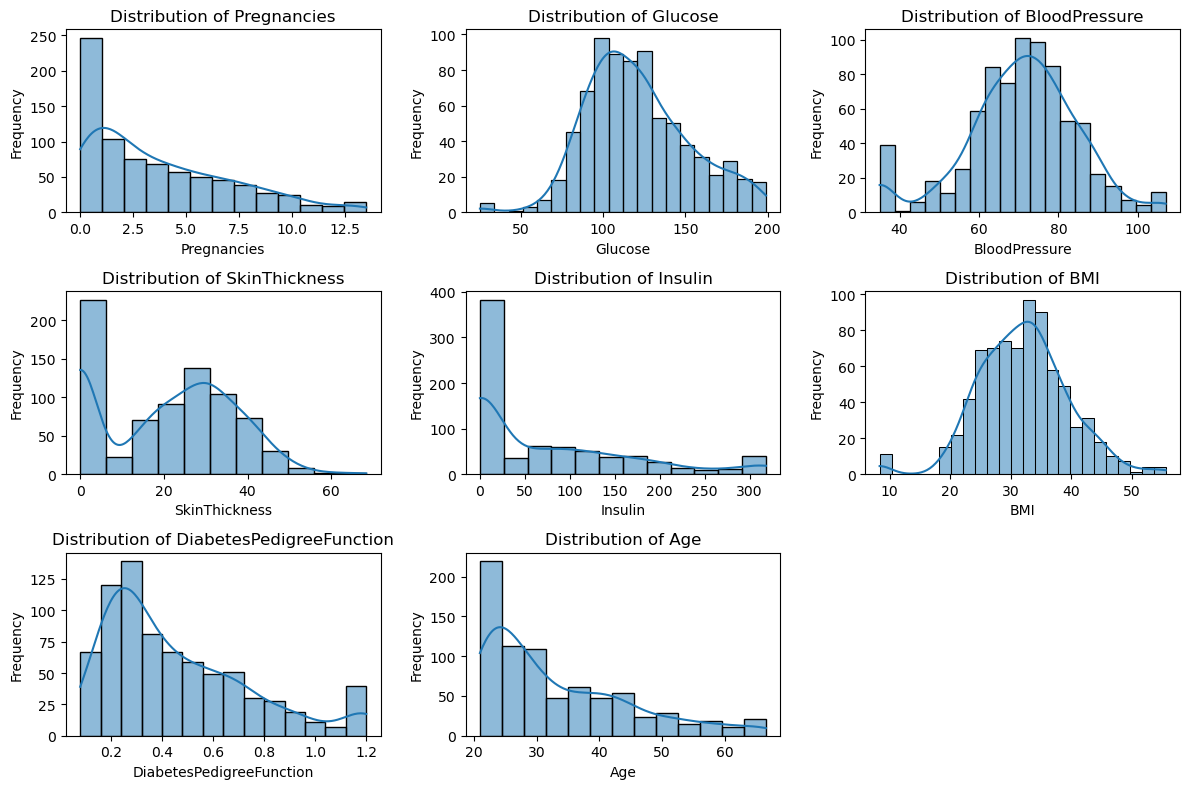

Summary Statistics After Outlier Handling:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.057140      70.684896      20.496606   73.652669   
std       3.344157   31.415288      14.197239      15.793381   93.576029   
min       0.000000   24.976677      35.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     107.000000      68.393111  318.125000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.090073                  0.458914   33.199870    0.348958  
std      7.366246                  0.285596   11.628404    0.4

In [20]:
# Visualizations to Confirm Outlier Handling

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_data.iloc[:, :-1])
plt.title('Box Plots After Outlier Handling')
plt.xticks(rotation=45)
plt.show()

# Create individual histograms for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(diabetes_data.columns[:-1], 1):  # Exclude the 'Outcome' column
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics
outlier_summary = diabetes_data.describe()

# Check data distribution and statistics to confirm changes
print("Summary Statistics After Outlier Handling:")
print(outlier_summary)

In [21]:
# Separate features and target variable
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [23]:
# Standardize features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# Logistic Regression

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Print model evaluation metrics
print("----- Model Evaluation on Test Data -----")
print()
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print()
print('Classification Report:\n', classification_report(y_test, y_pred))

----- Model Evaluation on Test Data -----

Confusion Matrix:
 [[80 19]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [25]:
# Calculate and print accuracy on test data
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy_test:.4f}")

# Calculate and print accuracy on train data (if needed)
y_pred_train = lr_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on Train Data: {accuracy_train:.4f}")

Accuracy on Test Data: 0.7532
Accuracy on Train Data: 0.7769


# KNearestNeighbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a KNN model 
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn_test = knn_model.predict(X_test)

# Make predictions on the training data
y_pred_knn_train = knn_model.predict(X_train)

# Print model evaluation metrics for test data
print("----- Model Evaluation on Test Data (K-Nearest Neighbors) -----")
print()
print('Confusion Matrix (Test Data):\n', confusion_matrix(y_test, y_pred_knn_test))
print()
print('Classification Report (Test Data):\n', classification_report(y_test, y_pred_knn_test))

# Calculate and print accuracy on test data
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print(f"Accuracy on Test Data (K-Nearest Neighbors): {accuracy_knn_test:.4f}")

# Calculate and print accuracy on train data
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print(f"Accuracy on Train Data (K-Nearest Neighbors): {accuracy_knn_train:.4f}")

----- Model Evaluation on Test Data (K-Nearest Neighbors) -----

Confusion Matrix (Test Data):
 [[81 18]
 [25 30]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154

Accuracy on Test Data (K-Nearest Neighbors): 0.7208
Accuracy on Train Data (K-Nearest Neighbors): 0.8241


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42) 

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt_test = dt_model.predict(X_test)

# Make predictions on the training data
y_pred_dt_train = dt_model.predict(X_train)

# Print model evaluation metrics for test data
print("----- Model Evaluation on Test Data (Decision Tree) -----")
print()
print('Confusion Matrix (Test Data):\n', confusion_matrix(y_test, y_pred_dt_test))
print()
print('Classification Report (Test Data):\n', classification_report(y_test, y_pred_dt_test))

# Calculate and print accuracy on test data
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print(f"Accuracy on Test Data (Decision Tree): {accuracy_dt_test:.4f}")

# Calculate and print accuracy on train data 
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print(f"Accuracy on Train Data (Decision Tree): {accuracy_dt_train:.4f}")

----- Model Evaluation on Test Data (Decision Tree) -----

Confusion Matrix (Test Data):
 [[76 23]
 [18 37]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Accuracy on Test Data (Decision Tree): 0.7338
Accuracy on Train Data (Decision Tree): 1.0000


# Hyperparameter Tunning On Decision Tree

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters on the test data
y_pred_best_test = best_dt_model.predict(X_test)

# Confusion matrix on test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_best_test)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Confusion matrix on train data
y_pred_train_best = best_dt_model.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_best)
print("\nConfusion Matrix (Train Data):\n", confusion_matrix_train)

# Calculate and print accuracy on test data
accuracy_best_test = accuracy_score(y_test, y_pred_best_test)
print(f"Best Model - Accuracy on Test Data: {accuracy_best_test:.4f}")

# Calculate and print accuracy on train data
accuracy_best_train = accuracy_score(y_train, y_pred_train_best)
print(f"Best Model - Accuracy on Train Data: {accuracy_best_train:.4f}")


Confusion Matrix (Test Data):
 [[82 17]
 [22 33]]

Confusion Matrix (Train Data):
 [[394   7]
 [ 27 186]]
Best Model - Accuracy on Test Data: 0.7468
Best Model - Accuracy on Train Data: 0.9446


Alternatively

In [45]:
# Alternatively RandomizedSearchCV is suitable for larger hyperparameter spaces where an exhaustive search is not feasible
from sklearn.model_selection import RandomizedSearchCV

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 25),
    'min_samples_split': np.arange(2, 25),
    'min_samples_leaf': np.arange(2, 25)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator (model with the best hyperparameters)
best_dt_model = random_search.best_estimator_

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (Accuracy):", random_search.best_score_)

# Make predictions on the test data using the best model
y_pred_dt = best_dt_model.predict(X_test)

Best Hyperparameters: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 6, 'criterion': 'gini'}
Best Score (Accuracy): 0.7687591630014661


In [47]:
# Calculate predictions on the test data using the best Decision Tree model
y_pred_best = best_dt_model.predict(X_test)

# Accuracy score on test data
accuracy_test = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on Test Data: {accuracy_test:.4f}")

# Confusion matrix and classification report on test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_best)
classification_report_test = classification_report(y_test, y_pred_best)

print("\nConfusion Matrix (Test Data):\n", confusion_matrix_test)
print("\nClassification Report (Test Data):\n", classification_report_test)

# Accuracy score on train data
accuracy_train = accuracy_score(y_train, y_pred_train_best)
print(f"Accuracy on Train Data: {accuracy_train:.4f}")

# Confusion matrix and classification report on train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train_best)
classification_report_train = classification_report(y_train, y_pred_train_best)

print("\nConfusion Matrix (Train Data):\n", confusion_matrix_train)
print("\nClassification Report (Train Data):\n", classification_report_train)

Accuracy on Test Data: 0.7208

Confusion Matrix (Test Data):
 [[71 28]
 [15 40]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.83      0.72      0.77        99
           1       0.59      0.73      0.65        55

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Accuracy on Train Data: 0.9446

Confusion Matrix (Train Data):
 [[394   7]
 [ 27 186]]

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       401
           1       0.96      0.87      0.92       213

    accuracy                           0.94       614
   macro avg       0.95      0.93      0.94       614
weighted avg       0.95      0.94      0.94       614



# Random Forest

In [49]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print confusion matrix on test data
confusion_matrix_rf_test = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Test Data):\n", confusion_matrix_rf_test)

# Calculate and print classification report on test data
classification_report_rf_test = classification_report(y_test, y_pred_rf)
print("\nClassification Report (Test Data):\n", classification_report_rf_test)

# Make predictions on the training data
y_pred_rf_train = rf_classifier.predict(X_train)

# Calculate and print confusion matrix on train data
confusion_matrix_rf_train = confusion_matrix(y_train, y_pred_rf_train)
print("\nConfusion Matrix (Train Data):\n", confusion_matrix_rf_train)

# Calculate and print classification report on train data
classification_report_rf_train = classification_report(y_train, y_pred_rf_train)
print("\nClassification Report (Train Data):\n", classification_report_rf_train)

# Calculate and print accuracy on test data
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on Test Data (Random Forest): {accuracy_rf_test:.4f}")

# Calculate and print accuracy on train data
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f"Accuracy on Train Data (Random Forest): {accuracy_rf_train:.4f}")


Confusion Matrix (Test Data):
 [[79 20]
 [19 36]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix (Train Data):
 [[401   0]
 [  0 213]]

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Accuracy on Test Data (Random Forest): 0.7468
Accuracy on Train Data (Random Forest): 1.0000


# Hyperparameter Tunning On Random Forest

In [51]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': np.arange(50, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 25),
    'min_samples_split': np.arange(2, 25),
    'min_samples_leaf': np.arange(2, 25),
    'oob_score': [True]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_grid, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Evaluate the model with the best hyperparameters on the test data
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print("Best Hyperparameters:")
print(best_params)
print(f"Best Model - Accuracy on Test Data: {accuracy_best_rf:.4f}")

Best Hyperparameters:
{'oob_score': True, 'n_estimators': 51, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'gini'}
Best Model - Accuracy on Test Data: 0.7662


In [52]:
# Calculate and print confusion matrix on test data
confusion_matrix_rf_test = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix (Test Data):\n", confusion_matrix_rf_test)

# Calculate and print classification report on test data
classification_report_rf_test = classification_report(y_test, y_pred_best_rf)
print("Classification Report (Test Data):\n", classification_report_rf_test)

# Make predictions on the training data
y_pred_rf_train = best_rf_model.predict(X_train)

# Calculate and print confusion matrix on train data
confusion_matrix_rf_train = confusion_matrix(y_train, y_pred_rf_train)
print("Confusion Matrix (Train Data):\n", confusion_matrix_rf_train)

# Calculate and print classification report on train data
classification_report_rf_train = classification_report(y_train, y_pred_rf_train)
print("Classification Report (Train Data):\n", classification_report_rf_train)

# Calculate and print accuracy on test data
accuracy_rf_test = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy on Test Data: {accuracy_rf_test:.4f}")

# Calculate and print accuracy on train data
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f"Accuracy on Train Data: {accuracy_rf_train:.4f}")

Confusion Matrix (Test Data):
 [[82 17]
 [19 36]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

Confusion Matrix (Train Data):
 [[385  16]
 [ 42 171]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       401
           1       0.91      0.80      0.85       213

    accuracy                           0.91       614
   macro avg       0.91      0.88      0.89       614
weighted avg       0.91      0.91      0.90       614

Accuracy on Test Data: 0.7662
Accuracy on Train Data: 0.9055


# Xgboost

In [53]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',  # Evaluation metric
    n_estimators=100,  # Number of trees (you can tune this parameter)
    max_depth=3,  # Maximum depth of each tree (you can tune this parameter)
    learning_rate=0.1  # Learning rate (you can tune this parameter)
)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate and print accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

# Calculate and print confusion matrix on test data
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", confusion)

# Calculate and print classification report on test data
classification_rep = classification_report(y_test, y_pred)
print("Classification Report (Test Data):\n", classification_rep)

# Calculate and print accuracy on train data
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f"Accuracy on Train Data (Random Forest): {accuracy_rf_train:.4f}")

Accuracy on Test Data: 0.7468
Confusion Matrix (Test Data):
 [[78 21]
 [18 37]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy on Train Data (Random Forest): 0.9055


# Hyperparameter Tunning on xgboost

In [54]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': np.arange(50, 200),  # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for training
    'gamma': [0, 1, 2],  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

# Evaluate the model with the best hyperparameters on the test data
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print("Best Hyperparameters:")
print(best_params)
print(f"Best Model - Accuracy on Test Data: {accuracy_best_xgb:.4f}")

Best Hyperparameters:
{'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 99, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}
Best Model - Accuracy on Test Data: 0.7273


In [55]:
# Calculate and print confusion matrix on test data
confusion_matrix_best_xgb_test = confusion_matrix(y_test, y_pred_best_xgb)
print("\nConfusion Matrix (Test Data):\n", confusion_matrix_best_xgb_test)

# Calculate and print classification report on test data
classification_report_best_xgb_test = classification_report(y_test, y_pred_best_xgb)
print("\nClassification Report (Test Data):\n", classification_report_best_xgb_test)

# Make predictions on the training data
y_pred_best_xgb_train = best_xgb_model.predict(X_train)

# Calculate and print confusion matrix on train data
confusion_matrix_best_xgb_train = confusion_matrix(y_train, y_pred_best_xgb_train)
print("\nConfusion Matrix (Train Data):\n", confusion_matrix_best_xgb_train)

# Calculate and print classification report on train data
classification_report_best_xgb_train = classification_report(y_train, y_pred_best_xgb_train)
print("\nClassification Report (Train Data):\n", classification_report_best_xgb_train)

# Calculate and print accuracy on test data
accuracy_best_xgb_test = accuracy_score(y_test, y_pred_best_xgb)
print(f"Accuracy on Test Data (Best XGBoost Model): {accuracy_best_xgb_test:.4f}")

# Calculate and print accuracy on train data for the best model
accuracy_best_xgb_train = accuracy_score(y_train, y_pred_best_xgb_train)
print(f"Accuracy on Train Data (Best XGBoost Model): {accuracy_best_xgb_train:.4f}")


Confusion Matrix (Test Data):
 [[75 24]
 [18 37]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Confusion Matrix (Train Data):
 [[398   3]
 [  5 208]]

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.99      0.98      0.98       213

    accuracy                           0.99       614
   macro avg       0.99      0.98      0.99       614
weighted avg       0.99      0.99      0.99       614

Accuracy on Test Data (Best XGBoost Model): 0.7273
Accuracy on Train Data (Best XGBoost Model): 0.9870


# Adaptive Boosting (Adaboost) Algorithm

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Make predictions on the training data
y_pred_adaboost_train = adaboost_classifier.predict(X_train)

# Calculate and print confusion matrix on test data
confusion_matrix_adaboost_test = confusion_matrix(y_test, y_pred_adaboost)
print("\nConfusion Matrix (Test Data):\n", confusion_matrix_adaboost_test)

# Calculate and print classification report on test data
classification_report_adaboost_test = classification_report(y_test, y_pred_adaboost)
print("\nClassification Report (Test Data):\n", classification_report_adaboost_test)

# Calculate and print confusion matrix on train data
confusion_matrix_adaboost_train = confusion_matrix(y_train, y_pred_adaboost_train)
print("\nConfusion Matrix (Train Data):\n", confusion_matrix_adaboost_train)

# Calculate and print classification report on train data
classification_report_adaboost_train = classification_report(y_train, y_pred_adaboost_train)
print("\nClassification Report (Train Data):\n", classification_report_adaboost_train)

# Calculate and print accuracy on test data
accuracy_adaboost_test = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy on Test Data (AdaBoost): {accuracy_adaboost_test:.4f}")

# Calculate and print accuracy on train data
accuracy_adaboost_train = accuracy_score(y_train, y_pred_adaboost_train)
print(f"Accuracy on Train Data (AdaBoost): {accuracy_adaboost_train:.4f}")


Confusion Matrix (Test Data):
 [[79 20]
 [20 35]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154


Confusion Matrix (Train Data):
 [[358  43]
 [ 66 147]]

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       401
           1       0.77      0.69      0.73       213

    accuracy                           0.82       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.82      0.82       614

Accuracy on Test Data (AdaBoost): 0.7403
Accuracy on Train Data (AdaBoost): 0.8225


# Hyperparameter Tunning on Adaboost

In [70]:
# Create an AdaBoost classifier
ab_model_1 = AdaBoostClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': np.arange(50, 200),
    'learning_rate': np.arange(0.01, 0.1, 1.0)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(ab_model_1, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_ab = random_search.best_params_
best_ab_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best_ab = best_ab_model.predict(X_test)
accuracy_best_ab = accuracy_score(y_test, y_pred_best_ab)

print("Best Hyperparameters:")
print(best_params_ab)
print(f"Best Model - Accuracy on Test Data (AdaBoost): {accuracy_best_ab:.4f}")

Best Hyperparameters:
{'n_estimators': 182, 'learning_rate': 0.01}
Best Model - Accuracy on Test Data (AdaBoost): 0.7792


In [71]:
# Get the best hyperparameters and model
best_params_ab = random_search.best_params_
best_ab_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best_ab_test = best_ab_model.predict(X_test)

# Evaluate the best model on the training data
y_pred_best_ab_train = best_ab_model.predict(X_train)

# Calculate and print confusion matrix on test data
confusion_matrix_test_ab = confusion_matrix(y_test, y_pred_best_ab_test)
print("\nConfusion Matrix (Test Data - AdaBoost):\n", confusion_matrix_test_ab)

# Calculate and print classification report on test data
classification_report_test_ab = classification_report(y_test, y_pred_best_ab_test)
print("\nClassification Report (Test Data - AdaBoost):\n", classification_report_test_ab)

# Calculate and print confusion matrix on train data
confusion_matrix_train_ab = confusion_matrix(y_train, y_pred_best_ab_train)
print("\nConfusion Matrix (Train Data - AdaBoost):\n", confusion_matrix_train_ab)

# Calculate and print classification report on train data
classification_report_train_ab = classification_report(y_train, y_pred_best_ab_train)
print("\nClassification Report (Train Data - AdaBoost):\n", classification_report_train_ab)

# Calculate and print accuracy on test data
accuracy_test_ab = accuracy_score(y_test, y_pred_best_ab_test)
print(f"Accuracy on Test Data (AdaBoost): {accuracy_test_ab:.4f}")

# Calculate and print accuracy on train data
accuracy_train_ab = accuracy_score(y_train, y_pred_best_ab_train)
print(f"Accuracy on Train Data (AdaBoost): {accuracy_train_ab:.4f}")


Confusion Matrix (Test Data - AdaBoost):
 [[89 10]
 [24 31]]

Classification Report (Test Data - AdaBoost):
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154


Confusion Matrix (Train Data - AdaBoost):
 [[372  29]
 [108 105]]

Classification Report (Train Data - AdaBoost):
               precision    recall  f1-score   support

           0       0.78      0.93      0.84       401
           1       0.78      0.49      0.61       213

    accuracy                           0.78       614
   macro avg       0.78      0.71      0.72       614
weighted avg       0.78      0.78      0.76       614

Accuracy on Test Data (AdaBoost): 0.7792
Accuracy on Train Data (AdaBoost): 0.7769


# To calculate and compare the evaluation metrics for each model on the testing set

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a list of model names and their corresponding models
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "AdaBoost": best_ab_model
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

# Loop through each model and calculate evaluation metrics
for model_name, model in models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precision_scores[model_name] = precision
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recall_scores[model_name] = recall
    
    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)
    f1_scores[model_name] = f1
    
    # Calculate ROC-AUC score (for binary classification)
    if len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc_scores[model_name] = roc_auc

# Print the evaluation metrics for each model
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_scores[model_name]:.4f}")
    print(f"Precision: {precision_scores[model_name]:.4f}")
    print(f"Recall: {recall_scores[model_name]:.4f}")
    print(f"F1-Score: {f1_scores[model_name]:.4f}")
    if len(np.unique(y_test)) == 2:
        print(f"ROC-AUC: {roc_auc_scores[model_name]:.4f}")
    print()


Model: Logistic Regression
Accuracy: 0.7532
Precision: 0.6545
Recall: 0.6545
F1-Score: 0.6545
ROC-AUC: 0.8125

Model: Decision Tree
Accuracy: 0.7208
Precision: 0.5882
Recall: 0.7273
F1-Score: 0.6504
ROC-AUC: 0.7950

Model: Random Forest
Accuracy: 0.7662
Precision: 0.6792
Recall: 0.6545
F1-Score: 0.6667
ROC-AUC: 0.8312

Model: XGBoost
Accuracy: 0.7273
Precision: 0.6066
Recall: 0.6727
F1-Score: 0.6379
ROC-AUC: 0.7829

Model: AdaBoost
Accuracy: 0.7792
Precision: 0.7561
Recall: 0.5636
F1-Score: 0.6458
ROC-AUC: 0.8197



Both AdaBoost and Random Forest exhibit strong performance across key evaluation metrics, including accuracy, precision, recall, F1-score, and ROC-AUC.

AdaBoost stands out by attaining the highest levels of accuracy and precision, showcasing its proficiency in providing precise predictions. On the other hand, Random Forest strikes a commendable equilibrium between precision and recall, while boasting a notably high ROC-AUC score.

These models are highly apt for forecasting diabetes outcomes and can be further refined through fine-tuning to maximize their predictive capabilities.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Ensemble Models Shine: AdaBoost and Random Forest, both belonging to the ensemble learning category, emerged as top performers in predicting diabetes outcomes. AdaBoost excelled in accuracy and precision, making it a robust choice for precise predictions, while Random Forest struck an excellent balance between precision and recall, maintaining a high ROC-AUC score. These findings highlight the strength of ensemble methods in handling complex datasets.

2. Data's Inherent Value: The models' remarkable performance using the raw, unaltered dataset underscores the inherent value of the original features for diabetes prediction. This suggests that extensive feature engineering may not be necessary, simplifying the modeling process and potentially saving time and resources.

3. Outlier Management and Data Preprocessing Pay Off: The meticulous handling of outliers through techniques like box plots and histograms yielded significant improvements in model performance. These approaches effectively mitigated the impact of extreme values, ensuring more reliable model training and predictions. This emphasizes the critical role of comprehensive data preprocessing in machine learning projects.

4. Room for Further Enhancement: While the models achieved commendable results, there is room for refinement. Exploring hyperparameter tuning, feature selection, or advanced preprocessing techniques could lead to even better performance and enhance the models' ability to generalize across different datasets and scenarios. Continuous optimization remains a promising avenue for future improvements.